In [59]:
import cv2
import os
import PIL
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
# Importing Google Image Dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.',untar=True)


In [3]:
# Image Count
import pathlib 
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [4]:
# Specfic Images
roses = list(data_dir.glob("roses/*.jpg"))
print(f"Total Images --> {len(roses)}\n\nDirectory: \n{roses[:5]}")

Total Images --> 641

Directory: 
[PosixPath('datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'), PosixPath('datasets/flower_photos/roses/483444865_65962cea07_m.jpg'), PosixPath('datasets/flower_photos/roses/3621011057_0d03bd171b_n.jpg'), PosixPath('datasets/flower_photos/roses/14176042519_5792b37555.jpg'), PosixPath('datasets/flower_photos/roses/5148639829_781eb7d346.jpg')]


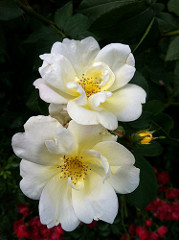

In [5]:
PIL.Image.open(roses[10])

In [6]:
# Making Image Dictionary and Labelling
flowers = {
    "daisy": list(data_dir.glob("daisy/*.jpg")),
    "dandelion": list(data_dir.glob("dandelion/*.jpg")),
    "roses": list(data_dir.glob("roses/*.jpg")),
    "sunflowers": list(data_dir.glob("sunflowers/*.jpg")),
    "tulips": list(data_dir.glob("tulips/*.jpg"))
}

Labels = {
    "daisy": 0,
    "dandelion": 1,
    "roses": 2,
    "sunflowers": 3,
    "tulips": 4
}

In [7]:
# Array converion using OpenCV
img = cv2.imread(str(flowers["daisy"][0]))
img.shape, cv2.resize(img,(180,180)).shape


((375, 500, 3), (180, 180, 3))

In [8]:
# Making Feature and Target 
X = []
y = []
for flower,images in flowers.items():
    for image in images:
        m = cv2.resize(cv2.imread(str(image)),(180,180))
        X.append(m)
        y.append(Labels[flower])


In [9]:
# Numpy Array Conversion
X = np.array(X)
y = np.array(y)

X.shape,y.shape

((3670, 180, 180, 3), (3670,))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5490705966949463..0.4509294033050537].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.7191275954246521..1.7191276550292969].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.571860134601593..1.5718600749969482].


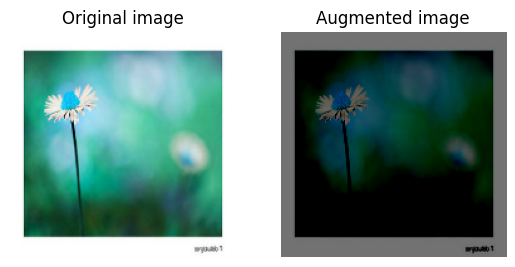

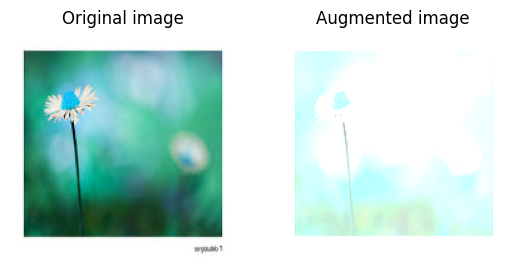

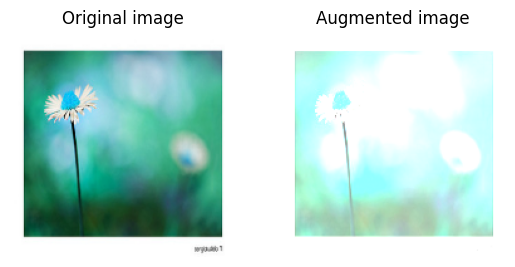

In [16]:
import matplotlib.pyplot as plt

def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)
  plt.axis("off")

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)
  plt.axis("off")

for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      X[1], max_delta=0.95, seed=seed)
  visualize(X[1], stateless_random_brightness)


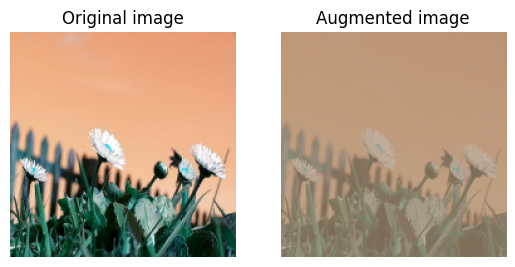

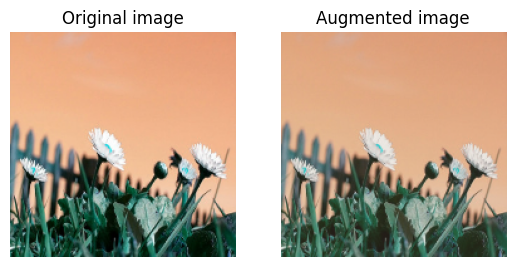

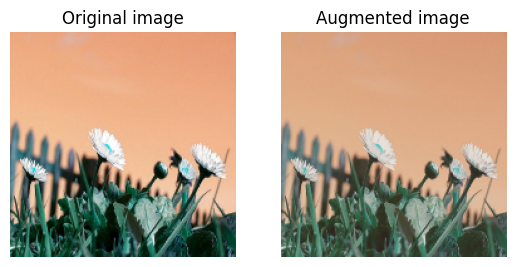

In [17]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_contrast = tf.image.stateless_random_contrast(
      X[5], lower=0.1, upper=0.9, seed=seed)
  visualize(X[5], stateless_random_contrast)


In [34]:
# Train-Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
X_train_scaled = X_train/255
X_test_scaled =X_test/255

In [16]:
# Let's make a CNN model
layer0 = Conv2D(input_shape = (180,180,3), activation= "relu", filters= 16, kernel_size= (4,4), padding= "same")
layer1 = MaxPooling2D((3,3))
layer2 = Conv2D(activation= "relu", filters= 32, kernel_size= (4,4), padding= "same")
layer3 = MaxPooling2D((3,3))
layer4 = Conv2D(activation= "relu", filters= 64, kernel_size= (4,4), padding= "same")
layer5 = MaxPooling2D((3,3))
layer6 = Flatten()
layer7 = Dense(units= 30, activation="relu")
layer8 = Dense(units= 5, activation="linear")

model1 = Sequential([layer0,layer1,layer3,layer4,layer5,layer6,layer7,layer8])

model1.compile(
    loss = SparseCategoricalCrossentropy(from_logits= True),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# CNN Model Fitting (1st Instance)
model1.fit(X_train,y_train,epochs=30)

Epoch 1/30


2024-10-03 12:38:13.322314: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1069977600 exceeds 10% of free system memory.
2024-10-03 12:38:16.190855: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66355200 exceeds 10% of free system memory.
2024-10-03 12:38:16.357028: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66355200 exceeds 10% of free system memory.


 1/86 ━━━━━━━━━━━━━━━━━━━━ 2:53 2s/step - accuracy: 0.1250 - loss: 1.6670

2024-10-03 12:38:16.413720: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24883200 exceeds 10% of free system memory.
2024-10-03 12:38:16.517824: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66355200 exceeds 10% of free system memory.


86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 234ms/step - accuracy: 0.2705 - loss: 1.5448
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.5239 - loss: 1.1456
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.5910 - loss: 1.0419
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.6170 - loss: 0.9817
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.6504 - loss: 0.8955
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.6645 - loss: 0.8503
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.7075 - loss: 0.7595
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.7159 - loss: 0.7379
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 225ms/step - accuracy: 0.7391 - loss: 0.6851
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - accuracy: 0.7763 - loss: 0.5966
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - accuracy: 0.7906 - loss: 0.5704
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/ste

In [18]:
#Model Evaluation
model1.evaluate(X_test,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6557 - loss: 1.6196


[1.6324213743209839, 0.6546840667724609]

- Sign of High Genreralization Error in the existing model

In [58]:
# Data Augmentation
from tensorflow.keras.layers import RandomRotation,RandomContrast,RandomZoom,RandomFlip,RandomBrightness,RandomTranslation
data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
  RandomContrast(0.1),
  RandomZoom(0.15),
  RandomBrightness(0.16),
  RandomTranslation(0.4, 0.12)
])


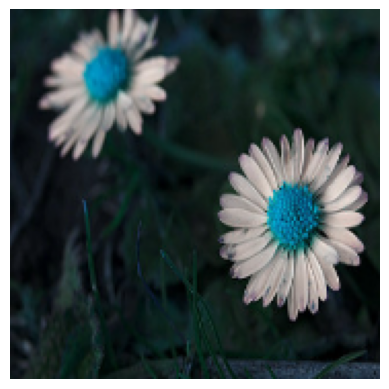

In [57]:
#Plotting Images
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(X[4])

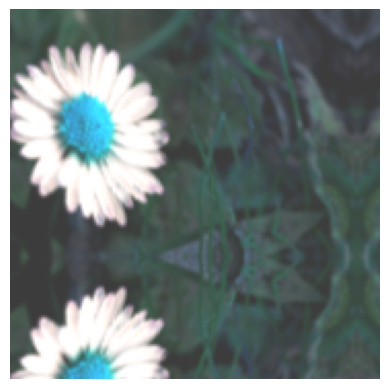

In [56]:
# Visualize Transformed Image
plt.axis("off")
plt.imshow(data_augmentation(X[:5])[4].numpy().astype("uint8"))

2024-10-03 14:59:06.944022: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1426896000 exceeds 10% of free system memory.
2024-10-03 14:59:08.029016: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1426896000 exceeds 10% of free system memory.
2024-10-03 14:59:09.637397: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1426896000 exceeds 10% of free system memory.
2024-10-03 14:59:10.971041: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1426896000 exceeds 10% of free system memory.
2024-10-03 14:59:12.933579: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1426896000 exceeds 10% of free system memory.


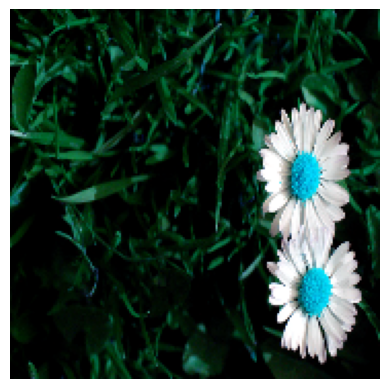

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import RandomContrast
 tf.expand_dims(X, 0)

# Define data augmentation pipeline
augment = tf.keras.Sequential([
    RandomContrast(0.45)
])

# Apply the augmentation to the input image
augmented_image = augment(X)[2]  # Assuming X is a batch and we visualize the 3rd image

# Visualize the transformed image
plt.axis("off")
plt.imshow(augmented_image.numpy().astype("uint8"))
plt.show()


In [60]:
# Let's make a CNN model (With Data Augmentation)
data_augmentation,
layer0 = Conv2D(input_shape = (180,180,3), activation= "relu", filters= 16, kernel_size= (4,4), padding= "same")
layer1 = MaxPooling2D((3,3))
layer2 = Conv2D(activation= "relu", filters= 32, kernel_size= (4,4), padding= "same")
layer3 = MaxPooling2D((3,3))
layer4 = Conv2D(activation= "relu", filters= 64, kernel_size= (4,4), padding= "same")
layer5 = MaxPooling2D((3,3))
layer5_1 = Dropout(0.2)
layer6 = Flatten()
layer7 = Dense(units= 30, activation="relu")
layer8 = Dense(units= 5, activation="linear")

model1 = Sequential([layer0,layer1,layer3,layer4,layer5_1,layer5,layer6,layer7,layer8])

model1.compile(
    loss = SparseCategoricalCrossentropy(from_logits= True),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# CNN Model Fitting (1st Instance)
model1.fit(X_train,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - accuracy: 0.2394 - loss: 15.7942
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.3662 - loss: 1.5066
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.4283 - loss: 1.3892
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 218ms/step - accuracy: 0.4417 - loss: 1.3606
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.4801 - loss: 1.2511
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.5044 - loss: 1.2216
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.5188 - loss: 1.1350
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.5924 - loss: 1.0038
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.6338 - loss: 0.9092
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.6686 - loss: 0.8262
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 226ms/step - accuracy: 0.7158 - loss: 0.7563
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2

In [62]:
model1.evaluate(X_test,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6128 - loss: 1.6347


[1.7106174230575562, 0.6023964881896973]